In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:

sd7_Q4 = pd.read_parquet("../data/sd7_Q4.parquet")
sd15_Q3 = pd.read_parquet("../data/sd15_Q3.parquet")
sd23_Q2 = pd.read_parquet("../data/sd23_Q2.parquet")

print(sd7_Q4.shape, sd15_Q3.shape, sd23_Q2.shape)

(50, 16) (46, 16) (40, 16)


In [9]:
combined = pd.concat(
    [sd7_Q4, sd15_Q3, sd23_Q2],
    ignore_index=True
)

combined.shape

(136, 16)

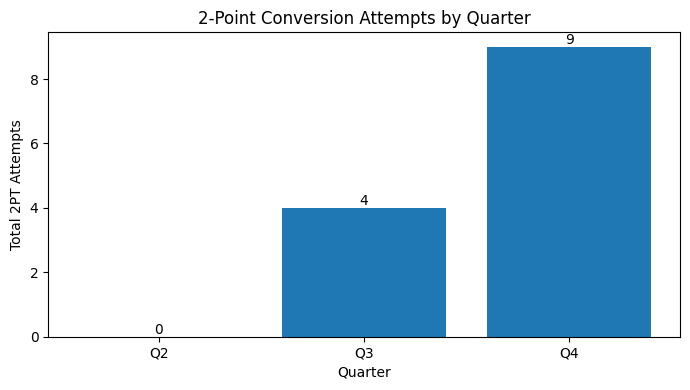

In [20]:
wft = combined['went_for_two'].fillna(False).astype(bool)

quarters = [2,3,4]
attempts_by_qtr = (
    combined.assign(wft=combined['went_for_two'].fillna(False).astype(bool))
            .groupby('qtr')['wft'].sum()
            .reindex(quarters, fill_value=0)
            .rename('num_attempts')
            .reset_index()
)

x = attempts_by_qtr['qtr'].astype(int).to_list()
y = attempts_by_qtr['num_attempts'].to_list()

plt.figure(figsize=(7,4))
bars = plt.bar(x, y)

plt.title("2-Point Conversion Attempts by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total 2PT Attempts")
plt.xticks([2,3,4], ["Q2","Q3","Q4"])  # adjust if you only have these

# simple value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

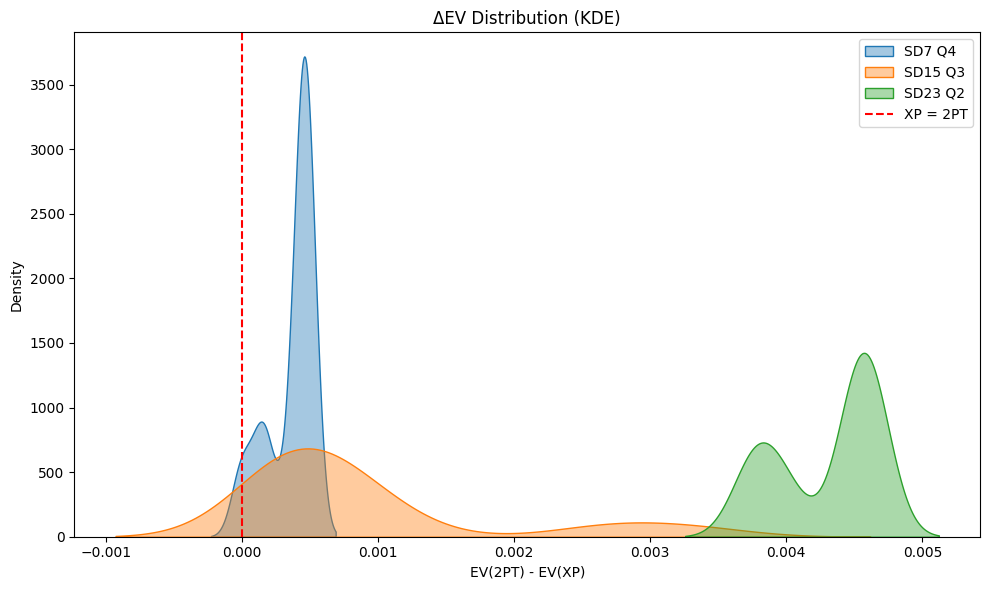

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(sd7_Q4['ev_diff_2pt_minus_xp'], label='SD7 Q4', fill=True, alpha=0.4)
sns.kdeplot(sd15_Q3['ev_diff_2pt_minus_xp'], label='SD15 Q3', fill=True, alpha=0.4)
sns.kdeplot(sd23_Q2['ev_diff_2pt_minus_xp'], label='SD23 Q2', fill=True, alpha=0.4)
plt.axvline(0, color='red', linestyle='--', label='XP = 2PT')
plt.title("ΔEV Distribution (KDE)")
plt.xlabel("EV(2PT) - EV(XP)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()